# INFO
- **● time_of_posts** = The time the job was posted on Hipages.
- **● latitudes** = The latitude of the job location,
- **● longitudes** = The longitude of the job location
- **● categorys** = An integer which represents the category for which the job is assigned. A
- **● categorys** (for example, painting, plumbing or air conditioning) allows us to assign the job to tradies who will be interested in the job.
- **● number_of_tradies** = The number of tradies who we can send this job out to.
- **● estimated_size** = The estimated size of the job, this is proportional to the amount
of revenue the tradie might get from the job.
- **● number_of_impressions** = The number of impressions the job gets from the trades.
- **● accepted** = A Boolean which represents if a tradie accepts a job invitation
(meaning that they have indicated to Hipages that they would like us to provide
them with the contact details of the consumer). 1 means at least one tradie was
interested while 0 means no tradie was interested. This is the target variable you
should focus to uncover its causal relationships with the other data.

# Questions

- Does the time-of-day influence if a job would be accepted?
- Can we predict using the data we have if a job would be accepted?
- How effective is estimated size to uncover differences in jobs, tradies, or behaviours?

In [32]:
## Question 1 - Does the time-of-day influence if a job would be accepted?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


jobs = pd.read_csv('Data Analytics Case Study - jobs.csv')

jobs.head(5)

,time_of_post,latitude,longitude,category,number_of_tradies,estimated_size,number_of_impressions,accepted
0,2019-09-15 11:40:06,-37.8994,144.9799,8,8376,medium,1004.0,0
1,2019-09-11 15:12:06,-37.8063,144.9964,3,5089,medium,772.0,0
2,2019-09-10 15:53:06,-37.8901,144.8885,7,3677,small,1103.0,0
3,2019-09-10 11:38:06,-33.7674,151.1690,3,9732,medium,1111.0,1
4,2019-09-10 17:38:06,-33.9091,151.2039,6,2476,small,360.0,0


In [33]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time_of_post           9999 non-null   object 
 1   latitude               9999 non-null   float64
 2    longitude             9999 non-null   float64
 3   category               9999 non-null   int64  
 4   number_of_tradies      9999 non-null   int64  
 5   estimated_size         9999 non-null   object 
 6   number_of_impressions  9889 non-null   float64
 7   accepted               9999 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [34]:
jobs.describe()

,latitude,longitude,category,number_of_tradies,number_of_impressions,accepted
count,9999.000000,9999.000000,9999.000000,9999.000000,9889.000000,9999.000000
mean,-34.613654,146.508822,4.819982,4225.784678,1015.828901,0.263626
std,4.786739,7.078573,1.857602,3020.932017,481.730727,0.440621
min,-38.221600,121.939400,1.000000,355.000000,-745.000000,0.000000
25%,-37.799350,144.937650,3.000000,1627.000000,689.000000,0.000000
50%,-34.000800,145.138800,5.000000,3677.000000,1007.000000,0.000000
75%,-33.841800,151.206350,6.000000,7267.000000,1339.000000,1.000000
max,-17.548400,151.542900,9.000000,10000.000000,3245.000000,1.000000


In [35]:
#Convert time_of_post to Date Time

jobs['time_of_post'] = pd.to_datetime(jobs['time_of_post'])

In [36]:
jobs['accepted'].value_counts()

0    7363
1    2636
Name: accepted, dtype: int64

In [37]:
#Extract Hour of Post, Day of Post

jobs['hour_of_post']= jobs['time_of_post'].dt.hour
jobs['day_of_post'] = jobs['time_of_post'].dt.weekday

In [38]:
# Define a function to categorize time into parts of the day to create period_of_post feature
def categorise_time(time):
    if 6 <= time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 17:
        return 'Afternoon'
    elif 17 <= time.hour < 21:
        return 'Evening'
    elif 21 <= time.hour < 24:
        return 'LateNight'
    else:
        return 'EarlyMorning'

In [39]:
jobs['period_of_post'] = jobs['time_of_post'].dt.time.apply(categorise_time)

In [40]:
#Check acceptance rate by hour_of_post


jobs.groupby('hour_of_post')['accepted'].mean().reset_index()

,hour_of_post,accepted
0,0,0.079365
1,1,0.138728
2,2,0.090909
3,3,0.130252
4,4,0.086957
5,5,0.109661
6,6,0.115468
7,7,0.083333
8,8,0.107926
9,9,0.114074


In [41]:
#Check acceptance rate by period_of_post

jobs.groupby('period_of_post')['accepted'].mean().reset_index()



,period_of_post,accepted
0,Afternoon,0.426600
1,EarlyMorning,0.106686
2,Evening,0.416844
3,LateNight,0.417323
4,Morning,0.104680


In [42]:
#Check acceptance rate by day_of_post

jobs.groupby('day_of_post')['accepted'].mean().reset_index()

,day_of_post,accepted
0,0,0.266243
1,1,0.270289
2,2,0.255994
3,3,0.272727
4,4,0.261199
5,5,0.253689
6,6,0.265292


In [43]:
#Create a separate Data Frame for Acceptance Rate by Period of Post

acceptance_rate_by_period = jobs.groupby('period_of_post')['accepted'].mean().reset_index()

In [44]:
acceptedjobs = jobs['accepted'].isin([True])

In [45]:
jobs[acceptedjobs].head()

,time_of_post,latitude,longitude,category,number_of_tradies,estimated_size,number_of_impressions,accepted,hour_of_post,day_of_post,period_of_post
3,2019-09-10 11:38:06,-33.7674,151.1690,3,9732,medium,1111.0,1,11,1,Morning
8,2019-09-15 15:42:06,-38.0545,144.9955,7,3677,medium,1642.0,1,15,6,Afternoon
21,2019-09-15 14:49:06,-37.8261,144.9803,8,8376,small,1210.0,1,14,6,Afternoon
23,2019-09-13 16:09:06,-33.9457,151.1543,6,2476,medium,711.0,1,16,4,Afternoon
33,2019-09-14 14:28:06,-33.7730,151.1242,7,4242,medium,1180.0,1,14,5,Afternoon


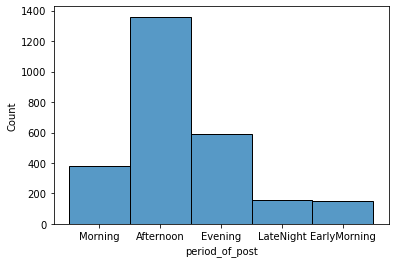

In [46]:
sns.histplot(data=jobs[acceptedjobs], x='period_of_post', binwidth=1)
plt.show()

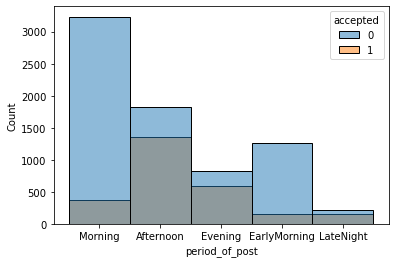

In [47]:
sns.histplot(data=jobs, x='period_of_post', hue='accepted', binwidth=1)
plt.show()

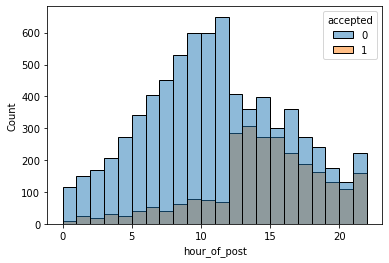

In [48]:
sns.histplot(data=jobs, x='hour_of_post', hue='accepted', binwidth=1)
plt.show()

In [49]:
pd.crosstab(jobs['accepted'], jobs['period_of_post'])

period_of_post,Afternoon,EarlyMorning,Evening,LateNight,Morning
accepted,,,,,
0,1828,1256,824,222,3233
1,1360,150,589,159,378


In [50]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(jobs['period_of_post'], jobs['accepted'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-Square Statistic: 1301.740916848764
P-Value: 1.395445156176058e-280


In [51]:
#Encode time_category

jobs = pd.get_dummies(jobs, columns=['period_of_post'], prefix='OH')

jobs.head()

,time_of_post,latitude,longitude,category,number_of_tradies,estimated_size,number_of_impressions,accepted,hour_of_post,day_of_post,OH_Afternoon,OH_EarlyMorning,OH_Evening,OH_LateNight,OH_Morning
0,2019-09-15 11:40:06,-37.8994,144.9799,8,8376,medium,1004.0,0,11,6,0,0,0,0,1
1,2019-09-11 15:12:06,-37.8063,144.9964,3,5089,medium,772.0,0,15,2,1,0,0,0,0
2,2019-09-10 15:53:06,-37.8901,144.8885,7,3677,small,1103.0,0,15,1,1,0,0,0,0
3,2019-09-10 11:38:06,-33.7674,151.1690,3,9732,medium,1111.0,1,11,1,0,0,0,0,1
4,2019-09-10 17:38:06,-33.9091,151.2039,6,2476,small,360.0,0,17,1,0,0,1,0,0


<AxesSubplot:>

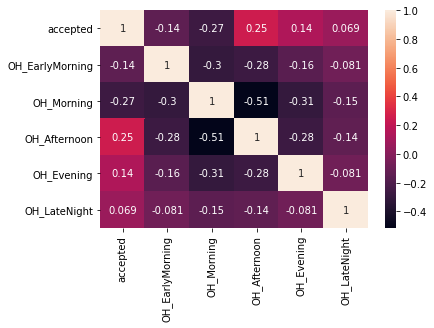

In [52]:
sns.heatmap(data=jobs[['accepted', 'OH_EarlyMorning', 'OH_Morning', 'OH_Afternoon', 'OH_Evening','OH_LateNight']].corr(), annot=True)

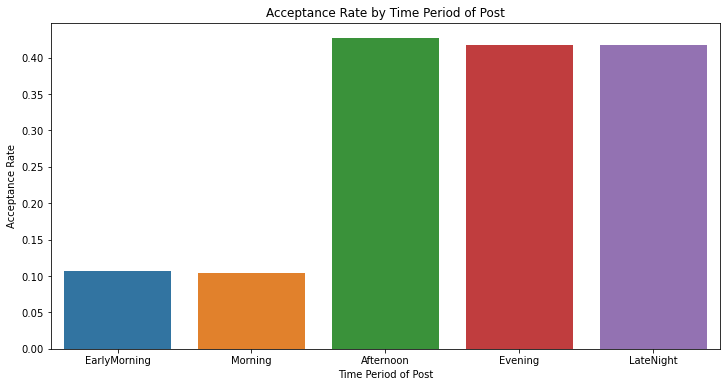

In [53]:

# Plot the acceptance rate by time period
plt.figure(figsize=(12, 6))
sns.barplot(data=acceptance_rate_by_period , x='period_of_post', y='accepted', order=['EarlyMorning', 'Morning', 'Afternoon', 'Evening', 'LateNight'])
plt.title('Acceptance Rate by Time Period of Post')
plt.xlabel('Time Period of Post')
plt.ylabel('Acceptance Rate')
plt.show()